In [58]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [59]:
dataset = pd.read_csv('Documents/Customer.csv')

In [60]:
df=dataset

In [61]:

df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [62]:
df.shape

(45211, 11)

In [63]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [64]:
df.drop(columns = ['day','mon'],inplace=True)

In [65]:
df.head()

,age,job,marital,education_qual,call_type,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,261,1,unknown,no
1,44,technician,single,secondary,unknown,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,92,1,unknown,no
4,33,unknown,single,unknown,unknown,198,1,unknown,no


#### Checking for missing value

In [66]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [67]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [68]:
df.head()

,age,job,marital,education_qual,call_type,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,261,1,unknown,no
1,44,technician,single,secondary,unknown,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,92,1,unknown,no
4,33,unknown,single,unknown,unknown,198,1,unknown,no


In [69]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [70]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [71]:
df['education_qual'].value_counts()
df['num_calls'].value_counts()
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

C:\Users\Madne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sales ')

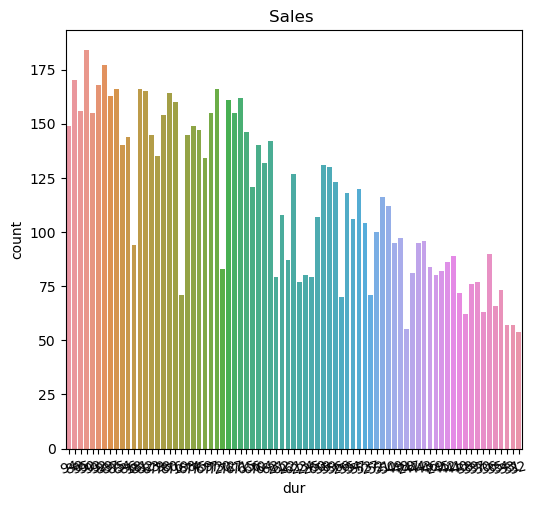

In [72]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['dur'],order=df['age'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('dur')
plt.ylabel('count')
plt.title('Sales ')

In [73]:
df['job'] = df['job'].replace({'admin.':'admin'})

In [74]:
#Interpretations :
 # According to the column "job" the highest number of conversion were in the job section "student" and lowest in blue color
df['job'] = df['job'].map({'blue-collar':2,'entrepreneur':3,'housemaid':4,'services':5,'technician':6,'unknown':1,'self-employed':7,'admin':8,'management':9,'unemployed':10,'retired':11,'student':12})

In [75]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Select the "marital" column to be encoded
marital_data = df[['marital']]

# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Fit the encoder to the "marital" data
encoder.fit(marital_data)

# Transform the "marital" data into binary features
marital_binary = encoder.transform(marital_data).toarray()

# Replace the "marital" column in the original DataFrame with the binary features
df = pd.concat([df.drop('marital', axis=1), pd.DataFrame(marital_binary, columns=encoder.get_feature_names(['marital']))], axis=1)

C:\Users\Madne\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [76]:
df['job'] = df['job'].astype('int64')

# Print the data types of the columns to verify the conversion
print(df.dtypes)

age                   int64
job                   int64
education_qual       object
call_type            object
dur                   int64
num_calls             int64
prev_outcome         object
y                    object
marital_divorced    float64
marital_married     float64
marital_single      float64
dtype: object


In [77]:
df['education_qual'] = df['education_qual'].map({'unknown':0,'primary':1,'secondary':2,'tertiary':3})
df['call_type'] = df['call_type'].map({'unknown':0,'cellular':1,'telephone':2})
df['prev_outcome'] = df['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':7})
df['y']=df['y'].map({'no':0,'yes':1})

In [78]:
df

,age,job,education_qual,call_type,dur,num_calls,prev_outcome,y,marital_divorced,marital_married,marital_single
0,58,9,3,0,261,1,0,0,0.0,1.0,0.0
1,44,6,2,0,151,1,0,0,0.0,0.0,1.0
2,33,3,2,0,76,1,0,0,0.0,1.0,0.0
3,47,2,0,0,92,1,0,0,0.0,1.0,0.0
4,33,1,0,0,198,1,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,6,3,1,977,3,0,1,0.0,1.0,0.0
45207,71,11,1,1,456,2,0,1,1.0,0.0,0.0
45208,72,11,2,1,1127,5,7,1,0.0,1.0,0.0
45209,57,2,2,2,508,4,0,0,0.0,1.0,0.0


In [79]:
#creating a function which will take the whole dataframe as input and return 2 dataframes, one containing input variables and the other
# holding the target variable

def split(dataframe):
  X = df.drop('y',axis=1)
  y = df['y']
  return X,y

In [80]:
X, y = split(df)

In [81]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [82]:
#splitting the data into training and testing sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3378)

In [83]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36168, 10) (9043, 10) (36168,) (9043,)


## Building a machine learning model

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [85]:
# Feature scaling
# ---------------
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [86]:
y_train

11043    0
36233    1
2550     0
24065    0
36739    0
        ..
9220     0
23111    0
5860     0
26852    0
7120     0
Name: y, Length: 36168, dtype: int64

In [87]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [88]:
# Make predictions on the testing data
y_pred = classifier.predict(X_test)

In [38]:
#data = data.astype({col: 'int64' for  in data.select_dtypes(include=['float64']).columns})


SyntaxError: invalid syntax (2295786817.py, line 1)

In [90]:
data=df

In [91]:
data.dtypes

age                   int64
job                   int64
education_qual        int64
call_type             int64
dur                   int64
num_calls             int64
prev_outcome          int64
y                     int64
marital_divorced    float64
marital_married     float64
marital_single      float64
dtype: object

In [92]:


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9039035718235099


In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [94]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [95]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')
print(f'ROC AUC score: {roc_auc}')

Accuracy: 0.9039035718235099
Precision: 0.6516007532956686
Recall: 0.3359223300970874
F1 score: 0.4433055733504164
ROC AUC score: 0.6564174236283515


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [98]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
y_pred = rfc.predict(X_test)

In [100]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


In [101]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('ROC AUC score:', roc_auc)

Accuracy: 0.8951675328983745
Precision: 0.5608308605341247
Recall: 0.36699029126213595
F1 score: 0.44366197183098594
ROC AUC score: 0.6650251593587605


In [1]:
#two model trained and tested one is logistics regression and other random Forest classifier.Accuracy and other parameters as above .
print('done!')

done!
